# Loading File

In [4]:
import geopandas
import contextily as ctx
from pysal.lib import examples

In [5]:
nyc_data = examples.load_example("NYC Socio-Demographics")

Example not available: NYC Socio-Demographics
Example not downloaded: Chicago parcels
Example not downloaded: Chile Migration
Example not downloaded: Spirals


In [6]:
examples.explain("NYC Socio-Demographics")

In [7]:
nyc_data.get_file_list()

['C:\\Users\\USER\\AppData\\Local\\pysal\\pysal\\NYC_Socio-Demographics\\NYC_Tract_ACS2008_12.dbf',
 'C:\\Users\\USER\\AppData\\Local\\pysal\\pysal\\NYC_Socio-Demographics\\NYC_Tract_ACS2008_12.prj',
 'C:\\Users\\USER\\AppData\\Local\\pysal\\pysal\\NYC_Socio-Demographics\\NYC_Tract_ACS2008_12.shp',
 'C:\\Users\\USER\\AppData\\Local\\pysal\\pysal\\NYC_Socio-Demographics\\NYC_Tract_ACS2008_12.shx',
 'C:\\Users\\USER\\AppData\\Local\\pysal\\pysal\\NYC_Socio-Demographics\\__MACOSX\\._NYC_Tract_ACS2008_12.dbf',
 'C:\\Users\\USER\\AppData\\Local\\pysal\\pysal\\NYC_Socio-Demographics\\__MACOSX\\._NYC_Tract_ACS2008_12.prj',
 'C:\\Users\\USER\\AppData\\Local\\pysal\\pysal\\NYC_Socio-Demographics\\__MACOSX\\._NYC_Tract_ACS2008_12.shp',
 'C:\\Users\\USER\\AppData\\Local\\pysal\\pysal\\NYC_Socio-Demographics\\__MACOSX\\._NYC_Tract_ACS2008_12.shx']

<AxesSubplot:>

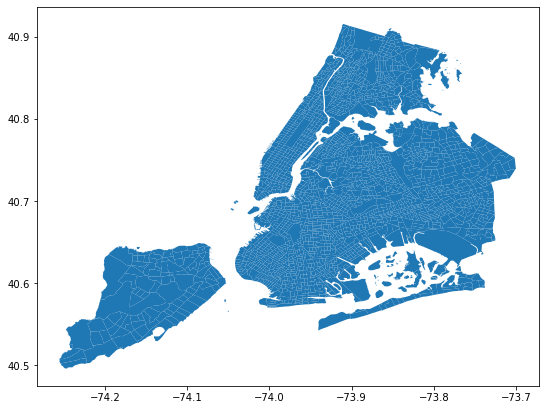

In [8]:
nyc = geopandas.read_file(nyc_data.get_path("NYC_Tract_ACS2008_12.shp"))
nyc.plot(figsize=(9, 9))

In [9]:
nyc.shape

(2166, 114)

# Analysis
Now with the nyc object ready to go, here a few tasks for you to complete:
- Create a contiguity matrix using the queen criterion
- Let’s focus on Central Park. The corresponding polygon is ID 142. How many neighbors does it have?
- Try to reproduce the zoom plot in the previous section.
- Create a block spatial weights matrix where every tract is connected to other tracts in the same borough. For that, use the borocode column of the nyc table.
- Compare the number of neighbors by tract for the two weights matrices, which one has more? why?

In [10]:
nyc.shape, nyc.columns

((2166, 114),
 Index(['UNEMP_RATE', 'cartodb_id', 'withssi', 'withsocial', 'withpubass',
        'struggling', 'profession', 'popunemplo', 'poptot', 'popover18',
        ...
        'geo_geoid', 'shape_leng', 'shape_area', 'ct2010', 'boroct2010',
        'borocode', 'tractid', 'popdty', 'geo_fips', 'geometry'],
       dtype='object', length=114))

In [11]:
nyc['cartodb_id'].nunique()

2166

In [12]:
from pysal.lib import weights

### Problem 1: Create a contiguity matrix using the queen criterion 

In [13]:
w_queen  = weights.Queen.from_dataframe(nyc)

C:\Users\USER\miniconda3\envs\geodata\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 3 islands with ids: 0, 626, 2165.
  warnings.warn(message)


### Problem 2: Let’s focus on Central Park. The corresponding polygon is ID 142. 
How many neighbors does it have?

In [14]:
w_queen.cardinalities[142]

30

### Problem 3: Plotting the Neighbours of a feature

In [15]:
import matplotlib.pyplot as plt

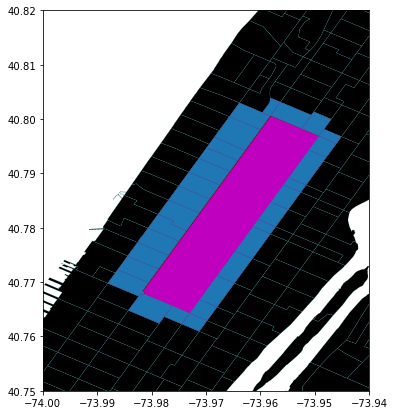

In [16]:
fig, ax =  plt.subplots(1, figsize=(7,7))
nyc.plot(ax=ax, facecolor='k', edgecolor='c', linewidth=0.1)
central_park = nyc.loc[[142],['geometry']]
central_park.plot(ax=ax, facecolor='m', linewidth=0.3, edgecolor='red')
neighbours = nyc.loc[w_queen[142].keys(),:]
neighbours.plot(ax=ax, edgecolor='m', linewidth=0.1)
ax.set_ylim(40.75, 40.82)
ax.set_xlim(-74, -73.94);

### Problem 3:
Create a block spatial weights matrix where every tract is connected to other tracts in the same borough. For that, use the borocode column of the nyc table.

In [17]:
nyc_block = weights.block_weights(nyc['borocode'])

C:\Users\USER\miniconda3\envs\geodata\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)


In [18]:
len(nyc_block[142])

287

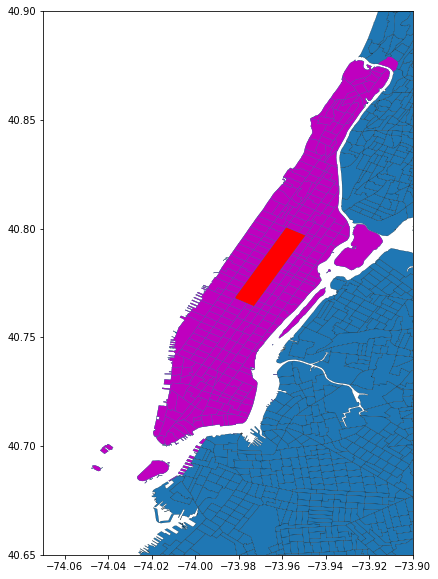

In [19]:
fig, ax = plt.subplots(1, figsize=(10, 10))
nyc.plot(ax=ax, edgecolor='k', linewidth=0.2)
nyc.loc[[142],:].plot(ax=ax, facecolor='red')
nyc.loc[nyc_block[142].keys(), :].plot(ax=ax, linewidth=0.1, facecolor='m', edgecolor='c')
ax.set_ylim(40.65, 40.9)
ax.set_xlim(-74.07, -73.9);

### Problem 4:
Compare the number of neighbors by tract for the two weights matrices, which one has more? why?

In [20]:
nyc.columns

Index(['UNEMP_RATE', 'cartodb_id', 'withssi', 'withsocial', 'withpubass',
       'struggling', 'profession', 'popunemplo', 'poptot', 'popover18',
       ...
       'geo_geoid', 'shape_leng', 'shape_area', 'ct2010', 'boroct2010',
       'borocode', 'tractid', 'popdty', 'geo_fips', 'geometry'],
      dtype='object', length=114)

In [21]:
nyc['queen'] = nyc.apply(lambda x: w_queen.cardinalities[x.name], axis=1)

In [22]:
nyc['block'] = nyc.apply(lambda x: nyc_block.cardinalities[x.name], axis=1)

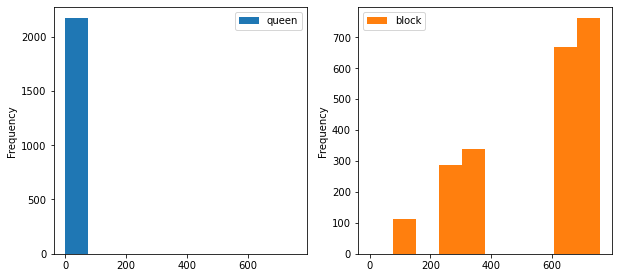

In [23]:
nyc.loc[:,['queen', 'block']].plot(figsize=(10,10),kind='hist',subplots=True, layout=(2,2));

# Japanese Cities

In [24]:
jp_cities = geopandas.read_file(
    "http://www.oecd.org/cfe/regionaldevelopment/Japan.zip"
)
jp_cities.head()

fuacode_si    fuaname fuaname_en  class_code iso3   name  \
0      JPN19  Kagoshima  Kagoshima         3.0  JPN  Japan   
1      JPN20     Himeji     Himeji         3.0  JPN  Japan   
2      JPN50    Hitachi    Hitachi         3.0  JPN  Japan   
3      JPN08  Hiroshima  Hiroshima         3.0  JPN  Japan   
4      JPN03     Toyota     Toyota         4.0  JPN  Japan   

                                            geometry  
0  MULTIPOLYGON Z (((130.67888 31.62931 0.00000, ...  
1  MULTIPOLYGON Z (((134.51537 34.65958 0.00000, ...  
2  POLYGON Z ((140.58715 36.94447 0.00000, 140.61...  
3  MULTIPOLYGON Z (((132.29648 34.19932 0.00000, ...  
4  MULTIPOLYGON Z (((137.04096 34.73242 0.00000, ...

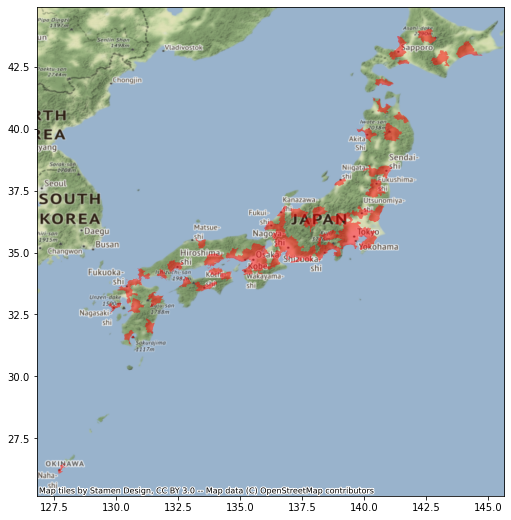

In [25]:
ax = jp_cities.plot(color="red", alpha=0.5, figsize=(9, 9))
ctx.add_basemap(ax, crs=jp_cities.crs)

In [26]:
jp = jp_cities.to_crs(epsg=2459)
jp.crs

<Derived Projected CRS: EPSG:2459>
Name: JGD2000 / Japan Plane Rectangular CS XVII
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Japan - onshore Okinawa-ken east of 130°E.
- bounds: (131.12, 24.4, 131.38, 26.01)
Coordinate Operation:
- name: Japan Plane Rectangular CS zone XVII
- method: Transverse Mercator
Datum: Japanese Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [27]:
jp.geometry  = jp.geometry.centroid

<AxesSubplot:>

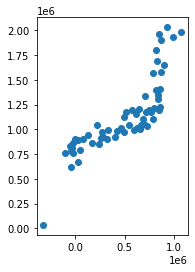

In [28]:
jp.plot()

In [29]:
knn_jp = weights.KNN.from_dataframe(jp, k=5)
knn_jp

In [30]:
jp_weights = weights.DistanceBand.from_dataframe(jp, 100000)

C:\Users\USER\miniconda3\envs\geodata\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 9 disconnected components.
 There are 4 islands with ids: 14, 17, 30, 54.
  warnings.warn(message)


In [35]:
jp_weights.mean_neighbors, knn_jp.mean_neighbors

(3.4098360655737703, 5.0)

In [36]:
jp_weights.max_neighbors, knn_jp.max_neighbors

(7, 5)

In [37]:
jp_weights.min_neighbors, knn_jp.min_neighbors

(0, 5)

In [38]:
jp_weights.islands, knn_jp.islands

([14, 17, 30, 54], [])

In [40]:
jp.head()

fuacode_si    fuaname fuaname_en  class_code iso3   name  \
0      JPN19  Kagoshima  Kagoshima         3.0  JPN  Japan   
1      JPN20     Himeji     Himeji         3.0  JPN  Japan   
2      JPN50    Hitachi    Hitachi         3.0  JPN  Japan   
3      JPN08  Hiroshima  Hiroshima         3.0  JPN  Japan   
4      JPN03     Toyota     Toyota         4.0  JPN  Japan   

                         geometry  
0   POINT (-46856.955 623832.951)  
1   POINT (333569.177 997075.925)  
2  POINT (858065.798 1229877.615)  
3   POINT (123222.438 939303.154)  
4  POINT (537285.936 1047382.748)

In [43]:
import pandas as pd

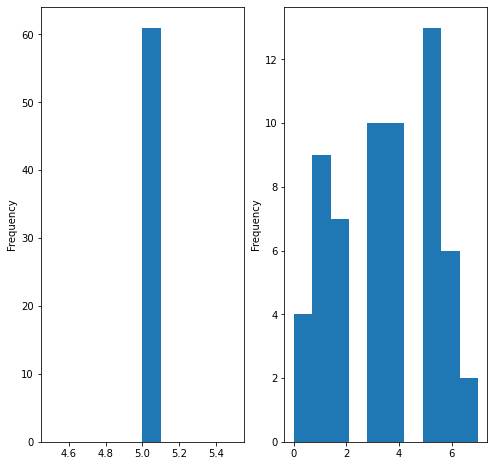

In [50]:
fig, ax = plt.subplots(1,2, figsize=(8,8))
pd.Series(knn_jp.cardinalities).plot(kind='hist', ax=ax[0])
pd.Series(jp_weights.cardinalities).plot(kind='hist', ax=ax[1]);

### Problem 3:
Focus on Tokyo (find the row in the table through a query search as we saw when considering Index-based queries) and the 100km spatial weights generated above. Try to create a figure similar to the one in the lecture. Here’s a recipe:

In [79]:
tokyo_point = jp[jp['fuaname']=='Tokyo']
tokyo_point

fuacode_si fuaname fuaname_en  class_code iso3   name  \
32      JPN01   Tokyo      Tokyo         4.0  JPN  Japan   

                          geometry  
32  POINT (784645.560 1107895.628)

In [82]:
jp_cities.columns

Index(['fuacode_si', 'fuaname', 'fuaname_en', 'class_code', 'iso3', 'name',
       'geometry'],
      dtype='object')

In [84]:
tokyo_poly = jp_cities.query('fuaname=="Tokyo"')
tokyo_poly

fuacode_si fuaname fuaname_en  class_code iso3   name  \
32      JPN01   Tokyo      Tokyo         4.0  JPN  Japan   

                                             geometry  
32  MULTIPOLYGON Z (((139.69215 35.41008 0.00000, ...

In [65]:
tokyo_neighbours = jp_weights.neighbors[32]
tokyo_neighbours

[6, 11, 37, 45, 58]

In [67]:
tokyo_neighbours = jp_cities.loc[tokyo_neighbours, :]

In [56]:
tokyo_buffer = tokyo.buffer(100000)

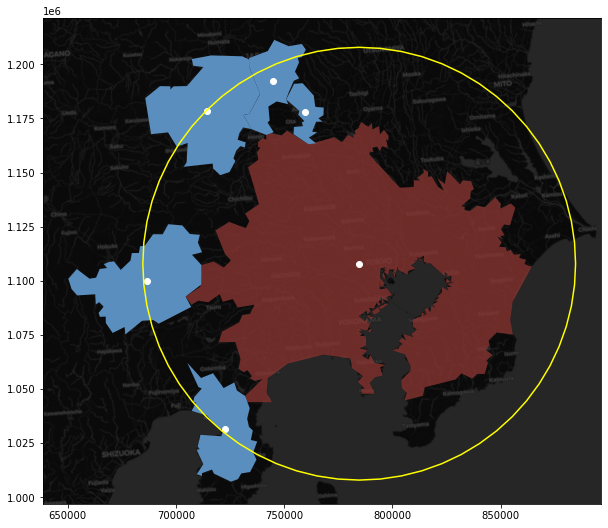

In [123]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
# jp_cities.to_crs(jp.crs).plot(ax=ax, facecolor='r')
tokyo_poly.to_crs(jp.crs).plot(ax=ax, alpha=0.8,facecolor='#873531')
tokyo_neighbours.to_crs(jp.crs).plot(ax=ax, facecolor='#5a8ebf')
tokyo_neighbours.to_crs(jp.crs).centroid.plot(ax=ax, facecolor='white')
tokyo_buffer.to_crs(jp.crs).plot(ax=ax, facecolor="none",  edgecolor='yellow', linewidth=1.5)
tokyo_point.plot(ax=ax, facecolor='white')
ax.set_xlim(638493.7759164765, 896367.0736493386)
ax.set_ylim(996935.9714415314, 1221532.7309046916)
ctx.add_basemap(ax=ax, crs=jp.crs, source='https://{s}.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}{r}.png')